# Libraries

In [268]:
# import relevant libraries
!pip install ondemand
!pip install py_vollib
import datetime
import py_vollib 
import ondemand
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
from scipy import stats
from datetime import datetime
from statsmodels.formula.api import ols
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics as sklMetrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from py_vollib.black_scholes_merton  import black_scholes_merton as bsm
from py_vollib.black_scholes_merton.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes_merton.greeks.analytical import delta 
from py_vollib.black_scholes_merton.greeks.analytical import gamma
from py_vollib.black_scholes_merton.greeks.analytical import rho
from py_vollib.black_scholes_merton.greeks.analytical import theta
from py_vollib.black_scholes_merton.greeks.analytical import vega
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Functions

In [269]:
# function to syntesize historical greeks and IV
def greek_val(flag, S, K, t, r, sigma):
    """
    price (float) – the Black-Scholes-Merton (American) option price
    S (float) – underlying asset price
    sigma (float) – annualized standard deviation, or volatility
    K (float) – strike price
    t (float) – time to expiration in years
    r (float) – risk-free interest rate
    flag (str) – ‘c’ or ‘p’ for call or put.
    """
    flag = 'c'
    price = bsm(flag, S, K, t, r, sigma, 0)
    imp_v = iv(price, S, K, t, r, 0, flag)
    delta_calc = delta(flag, S, K, t, r, sigma, 0)
    gamma_calc = gamma(flag, S, K, t, r, sigma, 0)
    rho_calc = rho(flag, S, K, t, r, sigma, 0)
    theta_calc = theta(flag, S, K, t, r, sigma, 0)
    vega_calc = vega(flag, S, K, t, r, sigma, 0)
    return np.array([ price, imp_v ,theta_calc, delta_calc ,rho_calc ,vega_calc ,gamma_calc])

In [270]:
# function for correlation matrix
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    sns.set_style(style = 'white')
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [271]:
# WIP mapping functions
def call_map(x):
    if x > 5:
        return 'BUY'
    elif x < -10:
        return 'WRITE'
    else:
        return 'HOLD'
def put_map(x):
    if x != 0:
        return 'WRITE'
    elif x == 0:
        return 'BUY'
    else:
        return 'HOLD'

# Import & Process Data

In [272]:
# read-in dataframes
underlying_df = pd.read_csv('hgh21_daily_historical-data-02-08-2021.csv')[0:450]
underlying_df.reset_index(drop=True, inplace=True)
put_op_75 = pd.read_csv('hgh1|75p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_100 = pd.read_csv('hgh1|100p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_125 = pd.read_csv('hgh1|125p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_150 = pd.read_csv('hgh1|150p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_175 = pd.read_csv('hgh1|175p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_200 = pd.read_csv('hgh1|200p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_225 = pd.read_csv('hgh1|225p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_250 = pd.read_csv('hgh1|250p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_275 = pd.read_csv('hgh1|275p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_300 = pd.read_csv('hgh1|300p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_325 = pd.read_csv('hgh1|325p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_350 = pd.read_csv('hgh1|350p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_375 = pd.read_csv('hgh1|375p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_400 = pd.read_csv('hgh1|400p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_425 = pd.read_csv('hgh1|425p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_450 = pd.read_csv('hgh1|450p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_475 = pd.read_csv('hgh1|475p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_500 = pd.read_csv('hgh1|500p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_525 = pd.read_csv('hgh1|525p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_550 = pd.read_csv('hgh1|550p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_575 = pd.read_csv('hgh1|575p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_600 = pd.read_csv('hgh1|600p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_625 = pd.read_csv('hgh1|625p_daily_historical-data-02-08-2021.csv')[:-1]

expiration = pd.to_datetime('02/28/2021')

underlying_df['days_to_exp'] = [(expiration - pd.to_datetime(underlying_df.iloc[i]['Time'])).total_seconds()/86400
                                for i in range(len(underlying_df))]

underlying_df['uHigh'] = underlying_df['High']
underlying_df['uLow'] = underlying_df['Low']
underlying_df['uLast'] = underlying_df['Last']
underlying_df['uChange'] = underlying_df['Change']
underlying_df['u%Chg'] = underlying_df['%Chg']
underlying_df['uOpenInt'] = underlying_df['Open Int']
underlying_df.drop(columns=['Time', 'High', 'Low', 'Last', 'Change', '%Chg', 'Open', 'Open Int'], inplace=True)

put_op_75['strike'] = 75
put_op_100['strike'] = 100 
put_op_125['strike'] = 125 
put_op_150['strike'] = 150 
put_op_175['strike'] = 175 
put_op_200['strike'] = 200 
put_op_225['strike'] = 225 
put_op_250['strike'] = 250 
put_op_275['strike'] = 275 
put_op_300['strike'] = 300 
put_op_325['strike'] = 325 
put_op_350['strike'] = 350 
put_op_375['strike'] = 375 
put_op_400['strike'] = 400 
put_op_425['strike'] = 425 
put_op_450['strike'] = 450 
put_op_475['strike'] = 475 
put_op_500['strike'] = 500 
put_op_525['strike'] = 525 
put_op_550['strike'] = 550 
put_op_575['strike'] = 575 
put_op_600['strike'] = 600 
put_op_625['strike'] = 625

put_op_75['spotDist'] = put_op_75['strike'] - underlying_df['uLast']*100
put_op_100['spotDist'] = put_op_100['strike'] - underlying_df['uLast']*100 
put_op_125['spotDist'] = put_op_125['strike'] - underlying_df['uLast']*100 
put_op_150['spotDist'] = put_op_150['strike'] - underlying_df['uLast']*100 
put_op_175['spotDist'] = put_op_175['strike'] - underlying_df['uLast']*100 
put_op_200['spotDist'] = put_op_200['strike'] - underlying_df['uLast']*100 
put_op_225['spotDist'] = put_op_225['strike'] - underlying_df['uLast']*100 
put_op_250['spotDist'] = put_op_250['strike'] - underlying_df['uLast']*100 
put_op_275['spotDist'] = put_op_275['strike'] - underlying_df['uLast']*100 
put_op_300['spotDist'] = put_op_300['strike'] - underlying_df['uLast']*100 
put_op_325['spotDist'] = put_op_325['strike'] - underlying_df['uLast']*100 
put_op_350['spotDist'] = put_op_350['strike'] - underlying_df['uLast']*100 
put_op_375['spotDist'] = put_op_375['strike'] - underlying_df['uLast']*100 
put_op_400['spotDist'] = put_op_400['strike'] - underlying_df['uLast']*100 
put_op_425['spotDist'] = put_op_425['strike'] - underlying_df['uLast']*100 
put_op_450['spotDist'] = put_op_450['strike'] - underlying_df['uLast']*100 
put_op_475['spotDist'] = put_op_475['strike'] - underlying_df['uLast']*100 
put_op_500['spotDist'] = put_op_500['strike'] - underlying_df['uLast']*100 
put_op_525['spotDist'] = put_op_525['strike'] - underlying_df['uLast']*100 
put_op_550['spotDist'] = put_op_550['strike'] - underlying_df['uLast']*100 
put_op_575['spotDist'] = put_op_575['strike'] - underlying_df['uLast']*100 
put_op_600['spotDist'] = put_op_600['strike'] - underlying_df['uLast']*100 
put_op_625['spotDist'] = put_op_625['strike'] - underlying_df['uLast']*100

put_op_75['uVolume'] = underlying_df['Volume'] 
put_op_100['uVolume'] = underlying_df['Volume'] 
put_op_125['uVolume'] = underlying_df['Volume'] 
put_op_150['uVolume'] = underlying_df['Volume'] 
put_op_175['uVolume'] = underlying_df['Volume'] 
put_op_200['uVolume'] = underlying_df['Volume'] 
put_op_225['uVolume'] = underlying_df['Volume'] 
put_op_250['uVolume'] = underlying_df['Volume'] 
put_op_275['uVolume'] = underlying_df['Volume'] 
put_op_300['uVolume'] = underlying_df['Volume'] 
put_op_325['uVolume'] = underlying_df['Volume'] 
put_op_350['uVolume'] = underlying_df['Volume'] 
put_op_375['uVolume'] = underlying_df['Volume'] 
put_op_400['uVolume'] = underlying_df['Volume'] 
put_op_425['uVolume'] = underlying_df['Volume'] 
put_op_450['uVolume'] = underlying_df['Volume'] 
put_op_475['uVolume'] = underlying_df['Volume'] 
put_op_500['uVolume'] = underlying_df['Volume'] 
put_op_525['uVolume'] = underlying_df['Volume'] 
put_op_550['uVolume'] = underlying_df['Volume'] 
put_op_575['uVolume'] = underlying_df['Volume'] 
put_op_600['uVolume'] = underlying_df['Volume'] 
put_op_625['uVolume'] = underlying_df['Volume']
underlying_df.drop(columns=['Volume'], inplace=True)

put_op_75['oVolume'] =  put_op_75['Volume']
put_op_100['oVolume'] = put_op_100['Volume']
put_op_125['oVolume'] = put_op_125['Volume'] 
put_op_150['oVolume'] = put_op_150['Volume'] 
put_op_175['oVolume'] = put_op_175['Volume'] 
put_op_200['oVolume'] = put_op_200['Volume'] 
put_op_225['oVolume'] = put_op_225['Volume'] 
put_op_250['oVolume'] = put_op_250['Volume'] 
put_op_275['oVolume'] = put_op_275['Volume'] 
put_op_300['oVolume'] = put_op_300['Volume'] 
put_op_325['oVolume'] = put_op_325['Volume'] 
put_op_350['oVolume'] = put_op_350['Volume'] 
put_op_375['oVolume'] = put_op_375['Volume'] 
put_op_400['oVolume'] = put_op_400['Volume'] 
put_op_425['oVolume'] = put_op_425['Volume'] 
put_op_450['oVolume'] = put_op_450['Volume'] 
put_op_475['oVolume'] = put_op_475['Volume'] 
put_op_500['oVolume'] = put_op_500['Volume'] 
put_op_525['oVolume'] = put_op_525['Volume'] 
put_op_550['oVolume'] = put_op_550['Volume'] 
put_op_575['oVolume'] = put_op_575['Volume'] 
put_op_600['oVolume'] = put_op_600['Volume'] 
put_op_625['oVolume'] = put_op_625['Volume']

# create low boundary for trading interval
low_bound = [underlying_df['uLow'][::-1][0]]
temp = underlying_df['uLow'][::-1]
for i in range(1, len(underlying_df)):
    if temp[i] <= min(low_bound):
        low_bound.append(temp[i])
    else:
        low_bound.append(low_bound[-1])
low_bound = low_bound
underlying_df['low_bound'] = low_bound

# create high boundary for trading interval
high_bound = [underlying_df['uHigh'][::-1][0]]
temp = underlying_df['uHigh'][::-1]
for i in range(1, len(underlying_df)):
    if temp[i] >= max(high_bound):
        high_bound.append(temp[i])
    else:
        high_bound.append(high_bound[-1])
high_bound = high_bound
underlying_df['high_bound'] = high_bound

put_op_75 = pd.concat([put_op_75, underlying_df], axis=1)
put_op_100 = pd.concat([put_op_100, underlying_df], axis=1)
put_op_125 = pd.concat([put_op_125, underlying_df], axis=1)
put_op_150 = pd.concat([put_op_150, underlying_df], axis=1)
put_op_175 = pd.concat([put_op_175, underlying_df], axis=1)
put_op_200 = pd.concat([put_op_200, underlying_df], axis=1)
put_op_225 = pd.concat([put_op_225, underlying_df], axis=1)
put_op_250 = pd.concat([put_op_250, underlying_df], axis=1)
put_op_275 = pd.concat([put_op_275, underlying_df], axis=1)
put_op_300 = pd.concat([put_op_300, underlying_df], axis=1)
put_op_325 = pd.concat([put_op_325, underlying_df], axis=1)
put_op_350 = pd.concat([put_op_350, underlying_df], axis=1)
put_op_375 = pd.concat([put_op_375, underlying_df], axis=1)
put_op_400 = pd.concat([put_op_400, underlying_df], axis=1)
put_op_425 = pd.concat([put_op_425, underlying_df], axis=1)
put_op_450 = pd.concat([put_op_450, underlying_df], axis=1)
put_op_475 = pd.concat([put_op_475, underlying_df], axis=1)
put_op_500 = pd.concat([put_op_500, underlying_df], axis=1)
put_op_525 = pd.concat([put_op_525, underlying_df], axis=1)
put_op_550 = pd.concat([put_op_550, underlying_df], axis=1)
put_op_575 = pd.concat([put_op_575, underlying_df], axis=1)
put_op_600 = pd.concat([put_op_600, underlying_df], axis=1)
put_op_625 = pd.concat([put_op_625, underlying_df], axis=1)

put_op_list = [put_op_75,
               put_op_100,
               put_op_125,
               put_op_150,
               put_op_175,
               put_op_200,
               put_op_225,
               put_op_250,
               put_op_275,
               put_op_300,
               put_op_325,
               put_op_350,
               put_op_375,
               put_op_400,
               put_op_425,
               put_op_450,
               put_op_475,
               put_op_500,
               put_op_525,
               put_op_550,
               put_op_575,
               put_op_600,
               put_op_625]

put_greek = []
for contract in put_op_list:
    
    writable = []
    buyable = []
    for day in range(len(contract)):
        if ((float(contract.iloc[day]['oVolume'])+float(contract.iloc[day]['Open Int'])) != 0):
            if contract.iloc[day]['strike']/100 <= contract.iloc[day]['low_bound']:
                writable.append(contract.iloc[day]['strike']/100)
            else:
                writable.append(0)
            if contract.iloc[day]['strike']/100 >= contract.iloc[day]['high_bound']:
                buyable.append(contract.iloc[day]['strike']/100)
            else:
                buyable.append(0)
        else:
            buyable.append(0)
            writable.append(0)
            
    greek_df = pd.DataFrame([greek_val('p',
                                         contract['uLast'][i],
                                         contract['strike'][i],
                                         (contract['days_to_exp'][i])/365,
                                         .5,
                                         contract['uLast'][i:].std())
                              for i in range(len(contract))],
                             columns=['price','imp_v','theta','delta','rho','vega','gamma'])
    contract['write_op'] = writable
    contract['buy_op'] = buyable
    contract = pd.concat([contract, greek_df], axis=1)
    put_greek.append(contract)
put_op_df = pd.concat(put_greek)
put_op_df['oHigh'] = put_op_df['High']
put_op_df['oLow'] = put_op_df['Low']
put_op_df['oLast'] = put_op_df['Last']
put_op_df['oChange'] = put_op_df['Change']
put_op_df['o%Chg'] = put_op_df['%Chg']
put_op_df['oOpenInt'] = put_op_df['Open Int']
put_op_df.drop(columns=['Time', 'Volume', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Open Int'], inplace=True)

# strip +/- and % sign from IV_Skew
new_one = []
new_two = []
for i in range(len(put_op_df)):
    line = put_op_df.iloc[i]['o%Chg']
    line = re.sub('[-%+,@]', '', line)
    new_one.append(line)
    line = put_op_df.iloc[i]['u%Chg']
    line = re.sub('[-%+,@]', '', line)
    new_two.append(line)
put_op_df['o%Chg'] = new_one
put_op_df['u%Chg'] = new_two

put_op_df.astype('float64')

target = []
for i in range(len(put_op_df)):
    if put_op_df.iloc[i]['buy_op'] != 0:
        target.append('BUY')
    elif put_op_df.iloc[i]['write_op'] != 0:
        target.append('WRITE')
    else:
        target.append('HOLD')
put_op_df['target'] = target


# Visualizations

In [273]:
put_op_df

strike  spotDist  uVolume  oVolume  days_to_exp   uHigh    uLow   uLast  \
0        75   -291.60  79906.0      0.0         20.0  3.6800  3.6225  3.6660   
1        75   -287.60  83459.0      0.0         23.0  3.6400  3.5515  3.6260   
2        75   -280.30  66302.0      0.0         24.0  3.5830  3.5370  3.5530   
3        75   -281.55  70465.0      0.0         25.0  3.5730  3.5035  3.5655   
4        75   -277.45  85090.0      0.0         26.0  3.5690  3.5000  3.5245   
..      ...       ...      ...      ...          ...     ...     ...     ...   
445     625    337.20     12.0      0.0        667.0  2.8780  2.8780  2.8780   
446     625    340.70      1.0      0.0        668.0  2.8430  2.8430  2.8430   
447     625    337.75      0.0      0.0        669.0  2.8725  2.8725  2.8725   
448     625    327.90      0.0      0.0        670.0  2.9710  2.9710  2.9710   
449     625    328.65      0.0      0.0        671.0  2.9635  2.9635  2.9635   

     uChange u%Chg  uOpenInt  low_bound  high_bound  write_op  buy_op  \
0     0.0400  1.10       0.0     3.6225       3.680       0.0     0.0   
1     0.0730  2.05  135339.0     3.5515       3.680       0.0     0.0   
2    -0.0125  0.35  141548.0     3.5370       3.680       0.0     0.0   
3     0.0410  1.16  145718.0     3.5035       3.680       0.0     0.0   
4    -0.0215  0.61  145643.0     3.5000       3.680       0.0     0.0   
..       ...   ...       ...        ...         ...       ...     ...   
445   0.0350  1.23      75.0     2.0650       3.734       0.0     0.0   
446  -0.0295  1.03      63.0     2.0650       3.734       0.0     0.0   
447  -0.0985  3.32      62.0     2.0650       3.734       0.0     0.0   
448   0.0075  0.25      62.0     2.0650       3.734       0.0     0.0   
449   0.0075  0.25      62.0     2.0650       3.734       0.0     0.0   

             price     imp_v          theta          delta            rho  \
0    3.247787e-313  0.338697 -1.179185e-311  4.225862e-311  8.470977e-314   
1    3.589752e-277  0.336762 -1.004372e-275  4.164576e-275  9.492923e-278   
2    7.117043e-272  0.335016 -1.872863e-270  8.211768e-270  1.913769e-272   
3    1.850943e-262  0.333619 -4.516517e-261  2.057060e-260  5.010916e-263   
4    1.999791e-256  0.332139 -4.586717e-255  2.188715e-254  5.480748e-257   
..             ...       ...            ...            ...            ...   
445   0.000000e+00  0.000000  -0.000000e+00   0.000000e+00   0.000000e+00   
446   0.000000e+00  0.000000  -0.000000e+00   0.000000e+00   0.000000e+00   
447   0.000000e+00  0.000000  -0.000000e+00   0.000000e+00   0.000000e+00   
448   0.000000e+00  0.000000  -0.000000e+00   0.000000e+00   0.000000e+00   
449   0.000000e+00  0.000000            NaN            NaN            NaN   

              vega          gamma   oHigh    oLow   oLast  oChange o%Chg  \
0    1.367605e-311  5.483120e-309  0.0005  0.0005  0.0005   0.0000  0.00   
1    1.343734e-275  4.816147e-273  0.0005  0.0005  0.0005   0.0000  0.00   
2    2.626253e-270  9.444140e-268  0.0005  0.0005  0.0005   0.0000  0.00   
3    6.618786e-261  2.278453e-258  0.0005  0.0005  0.0005   0.0000  0.00   
4    7.016000e-255  2.387231e-252  0.0005  0.0005  0.0005   0.0000  0.00   
..             ...            ...     ...     ...     ...      ...   ...   
445   0.000000e+00   0.000000e+00  3.3720  3.3720  3.3720  -0.0350  1.03   
446   0.000000e+00   0.000000e+00  3.4070  3.4070  3.4070   0.0295  0.87   
447   0.000000e+00   0.000000e+00  3.3775  3.3775  3.3775   0.0985  3.00   
448   0.000000e+00   0.000000e+00  3.2790  3.2790  3.2790  -0.0075  0.23   
449            NaN            NaN  3.2865  3.2865  3.2865  -0.0075  0.23   

     oOpenInt target  
0         0.0   HOLD  
1         0.0   HOLD  
2         0.0   HOLD  
3         0.0   HOLD  
4         0.0   HOLD  
..        ...    ...  
445       0.0   HOLD  
446       0.0   HOLD  
447       0.0   HOLD  
448       0.0   HOLD  
449       0.0   HOLD  

[10350 rows x 29 columns]

### Daily Trading Interval

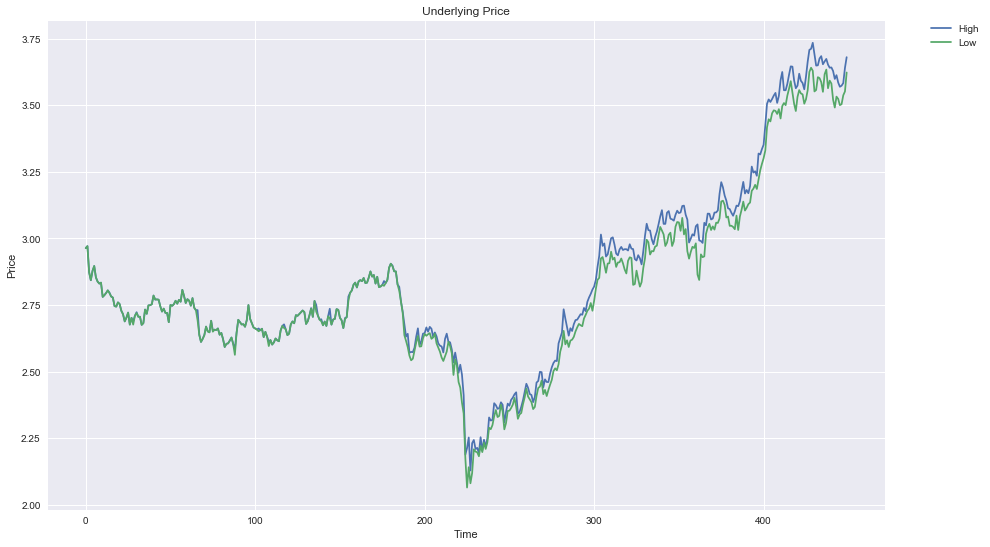

In [277]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))
plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], label='High')
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], label='Low')
plt.title('Underlying Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Underlying Price & Options Premia

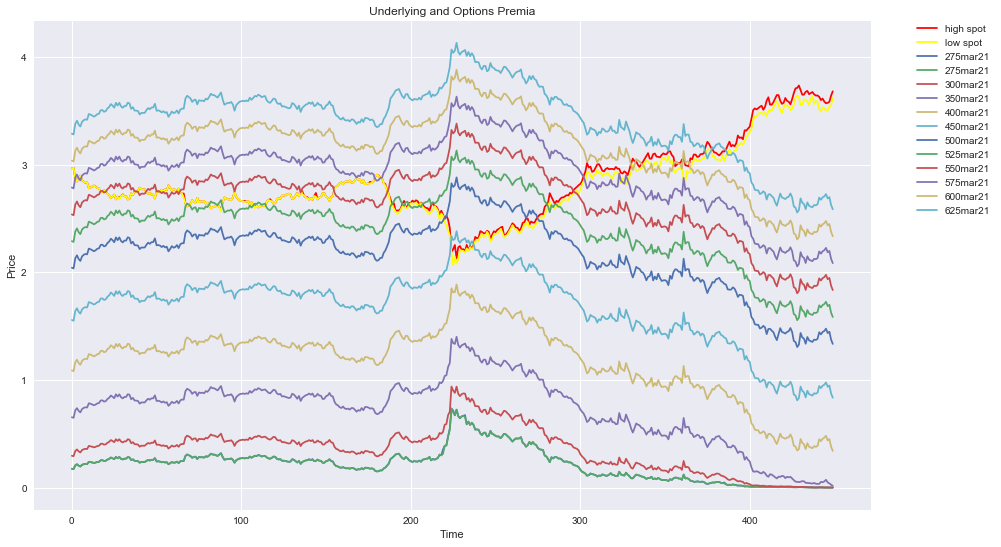

In [283]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))

plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], color='red', label='high spot')
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], color='yellow', label='low spot')

plt.plot(underlying_df.index[start:end], put_op_275['High'][::-1][start:end], label="275mar21")
plt.plot(underlying_df.index[start:end], put_op_275['Low'][::-1][start:end], label="275mar21")

plt.plot(underlying_df.index[start:end], put_op_300['Low'][::-1][start:end], label="300mar21")

plt.plot(underlying_df.index[start:end], put_op_350['Low'][::-1][start:end], label="350mar21")

plt.plot(underlying_df.index[start:end], put_op_400['Low'][::-1][start:end], label="400mar21")

plt.plot(underlying_df.index[start:end], put_op_450['Low'][::-1][start:end], label="450mar21")

plt.plot(underlying_df.index[start:end], put_op_500['Low'][::-1][start:end], label="500mar21")

plt.plot(underlying_df.index[start:end], put_op_525['Low'][::-1][start:end], label="525mar21")

plt.plot(underlying_df.index[start:end], put_op_550['Low'][::-1][start:end], label="550mar21")

plt.plot(underlying_df.index[start:end], put_op_575['Low'][::-1][start:end], label="575mar21")

plt.plot(underlying_df.index[start:end], put_op_600['Low'][::-1][start:end], label="600mar21")

plt.plot(underlying_df.index[start:end], put_op_625['Low'][::-1][start:end], label="625mar21")
plt.title('Underlying and Options Premia')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Volume & Open Interest - Combined

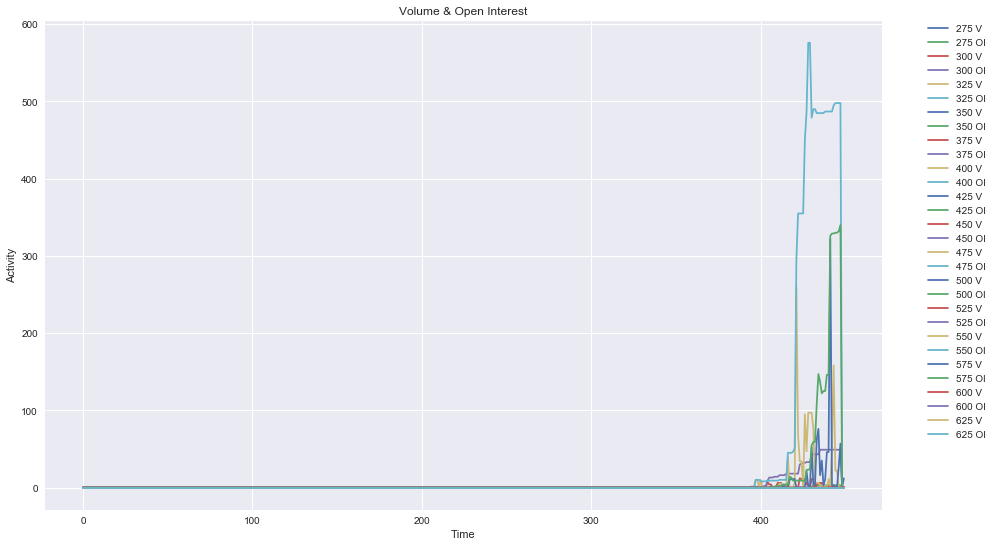

In [280]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))


plt.plot(underlying_df.index[start:end], put_op_275['Volume'][::-1][start:end], label="275 V")
plt.plot(underlying_df.index[start:end], put_op_275['Open Int'][::-1][start:end], label="275 OI")

plt.plot(underlying_df.index[start:end], put_op_300['Volume'][::-1][start:end], label="300 V")
plt.plot(underlying_df.index[start:end], put_op_300['Open Int'][::-1][start:end], label="300 OI")

plt.plot(underlying_df.index[start:end], put_op_325['Volume'][::-1][start:end], label="325 V")
plt.plot(underlying_df.index[start:end], put_op_325['Open Int'][::-1][start:end], label="325 OI")

plt.plot(underlying_df.index[start:end], put_op_350['Volume'][::-1][start:end], label="350 V")
plt.plot(underlying_df.index[start:end], put_op_350['Open Int'][::-1][start:end], label="350 OI")

plt.plot(underlying_df.index[start:end], put_op_375['Volume'][::-1][start:end], label="375 V")
plt.plot(underlying_df.index[start:end], put_op_375['Open Int'][::-1][start:end], label="375 OI")

plt.plot(underlying_df.index[start:end], put_op_400['Volume'][::-1][start:end], label="400 V")
plt.plot(underlying_df.index[start:end], put_op_400['Open Int'][::-1][start:end], label="400 OI")

plt.plot(underlying_df.index[start:end], put_op_425['Volume'][::-1][start:end], label="425 V")
plt.plot(underlying_df.index[start:end], put_op_425['Open Int'][::-1][start:end], label="425 OI")

plt.plot(underlying_df.index[start:end], put_op_450['Volume'][::-1][start:end], label="450 V")
plt.plot(underlying_df.index[start:end], put_op_450['Open Int'][::-1][start:end], label="450 OI")

plt.plot(underlying_df.index[start:end], put_op_475['Volume'][::-1][start:end], label="475 V")
plt.plot(underlying_df.index[start:end], put_op_475['Open Int'][::-1][start:end], label="475 OI")

plt.plot(underlying_df.index[start:end], put_op_500['Volume'][::-1][start:end], label="500 V")
plt.plot(underlying_df.index[start:end], put_op_500['Open Int'][::-1][start:end], label="500 OI")

plt.plot(underlying_df.index[start:end], put_op_525['Volume'][::-1][start:end], label="525 V")
plt.plot(underlying_df.index[start:end], put_op_525['Open Int'][::-1][start:end], label="525 OI")

plt.plot(underlying_df.index[start:end], put_op_550['Volume'][::-1][start:end], label="550 V")
plt.plot(underlying_df.index[start:end], put_op_550['Open Int'][::-1][start:end], label="550 OI")

plt.plot(underlying_df.index[start:end], put_op_575['Volume'][::-1][start:end], label="575 V")
plt.plot(underlying_df.index[start:end], put_op_575['Open Int'][::-1][start:end], label="575 OI")

plt.plot(underlying_df.index[start:end], put_op_600['Volume'][::-1][start:end], label="600 V")
plt.plot(underlying_df.index[start:end], put_op_600['Open Int'][::-1][start:end], label="600 OI")

plt.plot(underlying_df.index[start:end], put_op_625['Volume'][::-1][start:end], label="625 V")
plt.plot(underlying_df.index[start:end], put_op_625['Open Int'][::-1][start:end], label="625 OI")
plt.title('Volume & Open Interest')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Volume & Open Interest - Individual

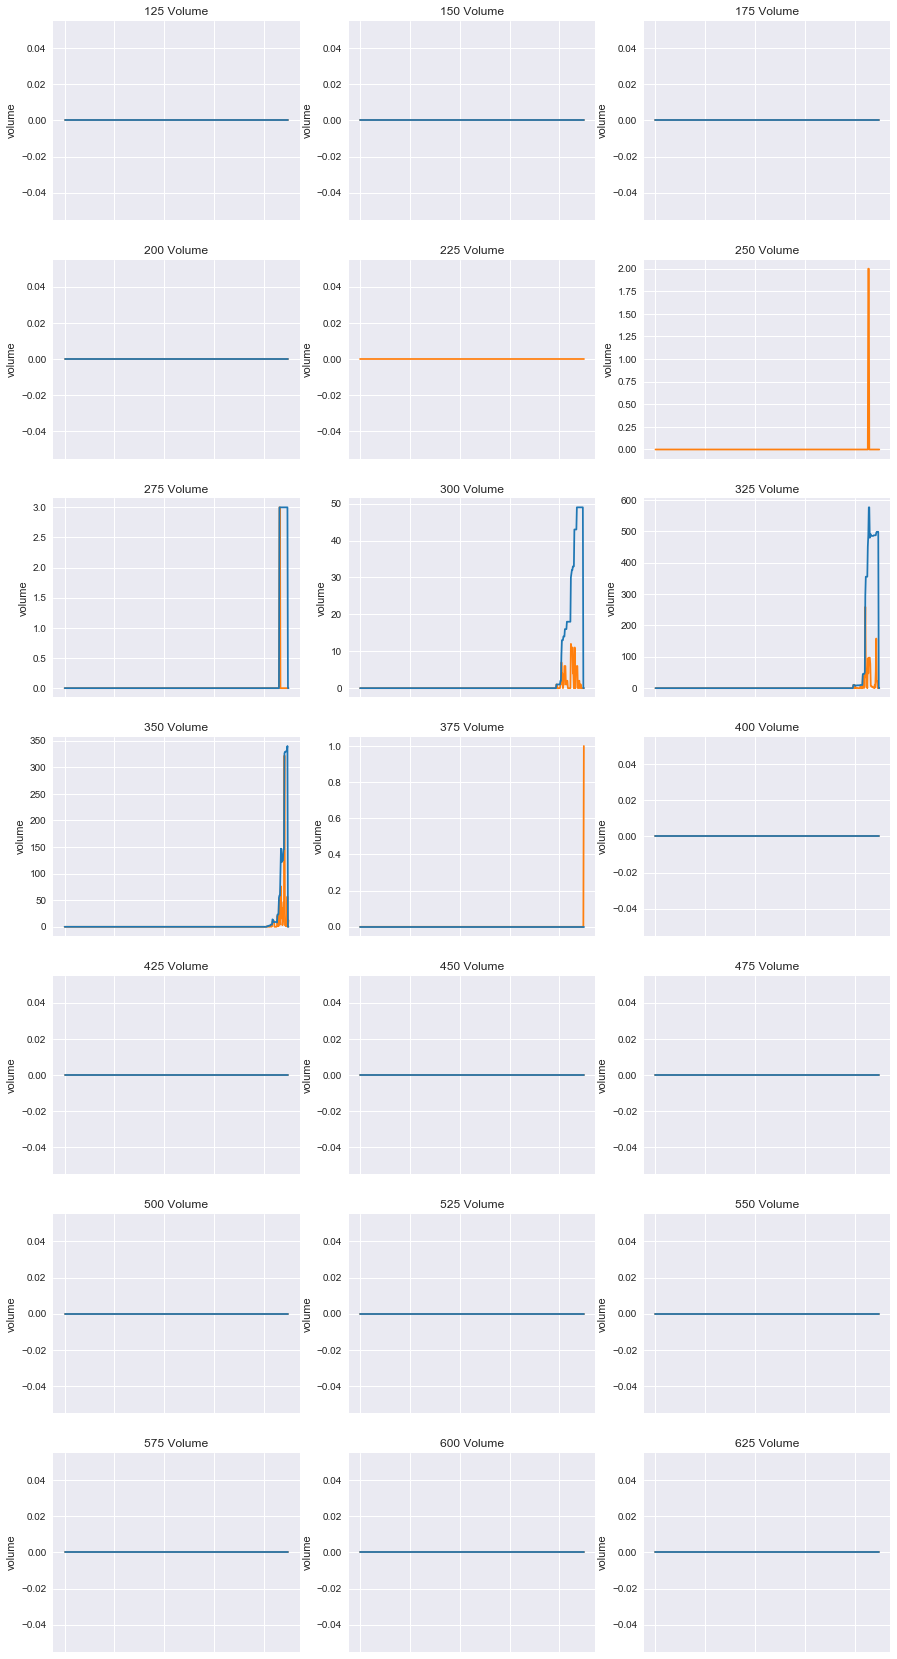

In [222]:
start = 0
end = len(underlying_df)
fig, axs = plt.subplots(7, 3)
fig.set_figheight(30)
fig.set_figwidth(15)

axs[0, 0].plot(underlying_df.index[start:end], put_op_125['Volume'][::-1][start:end], 'tab:orange')
axs[0, 0].plot(underlying_df.index[start:end], put_op_125['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 0].set_title('125 Volume')
axs[0, 1].plot(underlying_df.index[start:end], put_op_150['Volume'][::-1][start:end], 'tab:orange')
axs[0, 1].plot(underlying_df.index[start:end], put_op_150['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 1].set_title('150 Volume')
axs[0, 2].plot(underlying_df.index[start:end], put_op_175['Volume'][::-1][start:end], 'tab:orange')
axs[0, 2].plot(underlying_df.index[start:end], put_op_175['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 2].set_title('175 Volume')

axs[1, 0].plot(underlying_df.index[start:end], put_op_200['Volume'][::-1][start:end], 'tab:orange')
axs[1, 0].plot(underlying_df.index[start:end], put_op_200['Open Int'][::-1][start:end], 'tab:blue')
axs[1, 0].set_title('200 Volume')
axs[1, 1].plot(underlying_df.index[start:end], put_op_225['Volume'][::-1][start:end], 'tab:orange')
axs[1, 1].set_title('225 Volume')
axs[1, 2].plot(underlying_df.index[start:end], put_op_250['Volume'][::-1][start:end], 'tab:orange')
axs[1, 2].set_title('250 Volume')

axs[2, 0].plot(underlying_df.index[start:end], put_op_275['Volume'][::-1][start:end], 'tab:orange')
axs[2, 0].plot(underlying_df.index[start:end], put_op_275['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 0].set_title('275 Volume')
axs[2, 1].plot(underlying_df.index[start:end], put_op_300['Volume'][::-1][start:end], 'tab:orange')
axs[2, 1].plot(underlying_df.index[start:end], put_op_300['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 1].set_title('300 Volume')
axs[2, 2].plot(underlying_df.index[start:end], put_op_325['Volume'][::-1][start:end], 'tab:orange')
axs[2, 2].plot(underlying_df.index[start:end], put_op_325['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 2].set_title('325 Volume')


axs[3, 0].plot(underlying_df.index[start:end], put_op_350['Volume'][::-1][start:end], 'tab:orange')
axs[3, 0].plot(underlying_df.index[start:end], put_op_350['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 0].set_title('350 Volume')
axs[3, 1].plot(underlying_df.index[start:end], put_op_375['Volume'][::-1][start:end], 'tab:orange')
axs[3, 1].plot(underlying_df.index[start:end], put_op_375['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 1].set_title('375 Volume')
axs[3, 2].plot(underlying_df.index[start:end], put_op_400['Volume'][::-1][start:end], 'tab:orange')
axs[3, 2].plot(underlying_df.index[start:end], put_op_400['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 2].set_title('400 Volume')


axs[4, 0].plot(underlying_df.index[start:end], put_op_425['Volume'][::-1][start:end], 'tab:orange')
axs[4, 0].plot(underlying_df.index[start:end], put_op_425['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 0].set_title('425 Volume')
axs[4, 1].plot(underlying_df.index[start:end], put_op_450['Volume'][::-1][start:end], 'tab:orange')
axs[4, 1].plot(underlying_df.index[start:end], put_op_450['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 1].set_title('450 Volume')
axs[4, 2].plot(underlying_df.index[start:end], put_op_475['Volume'][::-1][start:end], 'tab:orange')
axs[4, 2].plot(underlying_df.index[start:end], put_op_475['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 2].set_title('475 Volume')

axs[5, 0].plot(underlying_df.index[start:end], put_op_500['Volume'][::-1][start:end], 'tab:orange')
axs[5, 0].plot(underlying_df.index[start:end], put_op_500['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 0].set_title('500 Volume')
axs[5, 1].plot(underlying_df.index[start:end], put_op_525['Volume'][::-1][start:end], 'tab:orange')
axs[5, 1].plot(underlying_df.index[start:end], put_op_525['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 1].set_title('525 Volume')
axs[5, 2].plot(underlying_df.index[start:end], put_op_550['Volume'][::-1][start:end], 'tab:orange')
axs[5, 2].plot(underlying_df.index[start:end], put_op_550['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 2].set_title('550 Volume')

axs[6, 0].plot(underlying_df.index[start:end], put_op_575['Volume'][::-1][start:end], 'tab:orange')
axs[6, 0].plot(underlying_df.index[start:end], put_op_575['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 0].set_title('575 Volume')
axs[6, 1].plot(underlying_df.index[start:end], put_op_600['Volume'][::-1][start:end], 'tab:orange')
axs[6, 1].plot(underlying_df.index[start:end], put_op_600['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 1].set_title('600 Volume')
axs[6, 2].plot(underlying_df.index[start:end], put_op_625['Volume'][::-1][start:end], 'tab:orange')
axs[6, 2].plot(underlying_df.index[start:end], put_op_625['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 2].set_title('625 Volume')


for ax in axs.flat:
    ax.set(xlabel='', ylabel='volume')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    #ax.label_outer()
    ax.set_xticklabels([])

### Trading Interval &  Write/Buy Opportunitites

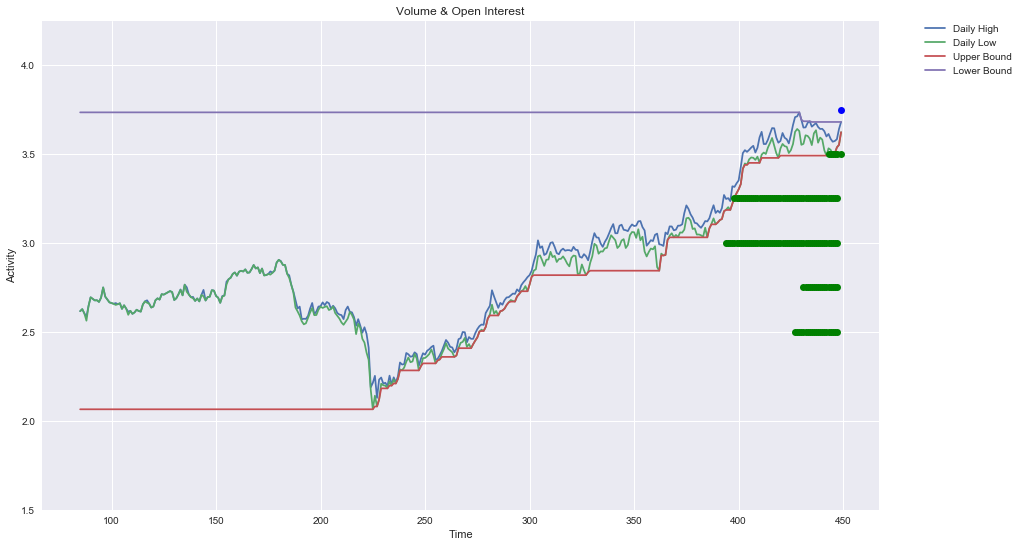

In [282]:
# plot construction
start = -365
end = len(underlying_df)
plt.figure(figsize=(15,9))
plt.ylim(1.5,4.25)
plt.ylabel('Spot Price')
plt.xlabel('Date')

# underlying futures price
plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], label="Daily High")
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], label="Daily Low")

# trading intervals
plt.plot(underlying_df.index[start:end], underlying_df['low_bound'][::-1][start:end], label="Upper Bound")
plt.plot(underlying_df.index[start:end], underlying_df['high_bound'][::-1][start:end], label="Lower Bound")

# trade opportunities
for contract in put_greek:
    plt.plot(underlying_df.index[start:end], contract['write_op'][::-1][start:end], 'go')
    plt.plot(underlying_df.index[start:end], contract['buy_op'][::-1][start:end], 'bo')
    
plt.title('Volume & Open Interest')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Scaling

In [254]:
put_op_df.fillna(0, inplace=True)
scaling_df = put_op_df.drop(columns=['target'])
scaler = MinMaxScaler()
scaler.fit(scaling_df)
scaled = scaler.transform(scaling_df)
scaled_df = pd.DataFrame(scaled, columns=scaling_df.columns)
scaled_df = round(scaled_df * 255)
scaled_df = scaled_df.astype('int64')
scaled_df['target'] = list(put_op_df['target'])

In [256]:
scaled_df

strike  spotDist  uVolume  oVolume  days_to_exp  uHigh  uLow  uLast  \
0           0         1      177        0            0    246   252    250   
1           0         3      184        0            1    240   241    244   
2           0         5      147        0            2    231   238    232   
3           0         5      156        0            2    229   233    234   
4           0         6      188        0            2    229   232    227   
...       ...       ...      ...      ...          ...    ...   ...    ...   
10345     255       228        0        0          253    119   132    123   
10346     255       229        0        0          254    113   126    117   
10347     255       228        0        0          254    118   131    122   
10348     255       224        0        0          255    134   147    138   
10349     255       225        0        0          255    133   145    137   

       uChange  u%Chg  uOpenInt  low_bound  high_bound  write_op  buy_op  \
0          190     41         0        255           0         0       0   
1          220     77       203        243           0         0       0   
2          141     13       212        241           0         0       0   
3          191     43       218        236           0         0       0   
4          133     23       218        235           0         0       0   
...        ...    ...       ...        ...         ...       ...     ...   
10345      185     46         0          0         255         0       0   
10346      125     38         0          0         255         0       0   
10347       62    124         0          0         255         0       0   
10348      160      9         0          0         255         0       0   
10349      160      9         0          0         255         0       0   

       price  imp_v  theta  delta  rho  vega  gamma  oHigh  oLow  oLast  \
0          0     71    255      0    0     0      0      0     0      0   
1          0     71    255      0    0     0      0      0     0      0   
2          0     70    255      0    0     0      0      0     0      0   
3          0     70    255      0    0     0      0      0     0      0   
4          0     70    255      0    0     0      0      0     0      0   
...      ...    ...    ...    ...  ...   ...    ...    ...   ...    ...   
10345      0      0    255      0    0     0      0    208   208    208   
10346      0      0    255      0    0     0      0    210   210    210   
10347      0      0    255      0    0     0      0    209   209    209   
10348      0      0    255      0    0     0      0    202   202    202   
10349      0      0    255      0    0     0      0    203   203    203   

       oChange  o%Chg  oOpenInt target  
0           88      0         0   HOLD  
1           88      0         0   HOLD  
2           88      0         0   HOLD  
3           88      0         0   HOLD  
4           88      0         0   HOLD  
...        ...    ...       ...    ...  
10345       60      0         0   HOLD  
10346      111      0         0   HOLD  
10347      166      0         0   HOLD  
10348       82      0         0   HOLD  
10349       82      0         0   HOLD  

[10350 rows x 29 columns]

In [226]:
#svd = TruncatedSVD()
#svd.fit(scaled_df)
#call_singular_values = svd.singular_values_
#transformed = svd.transform(scaled_calls)
#print('transformed:', transformed.shape)
#print('singular_values:', singular_values)
#transformed_df.head()

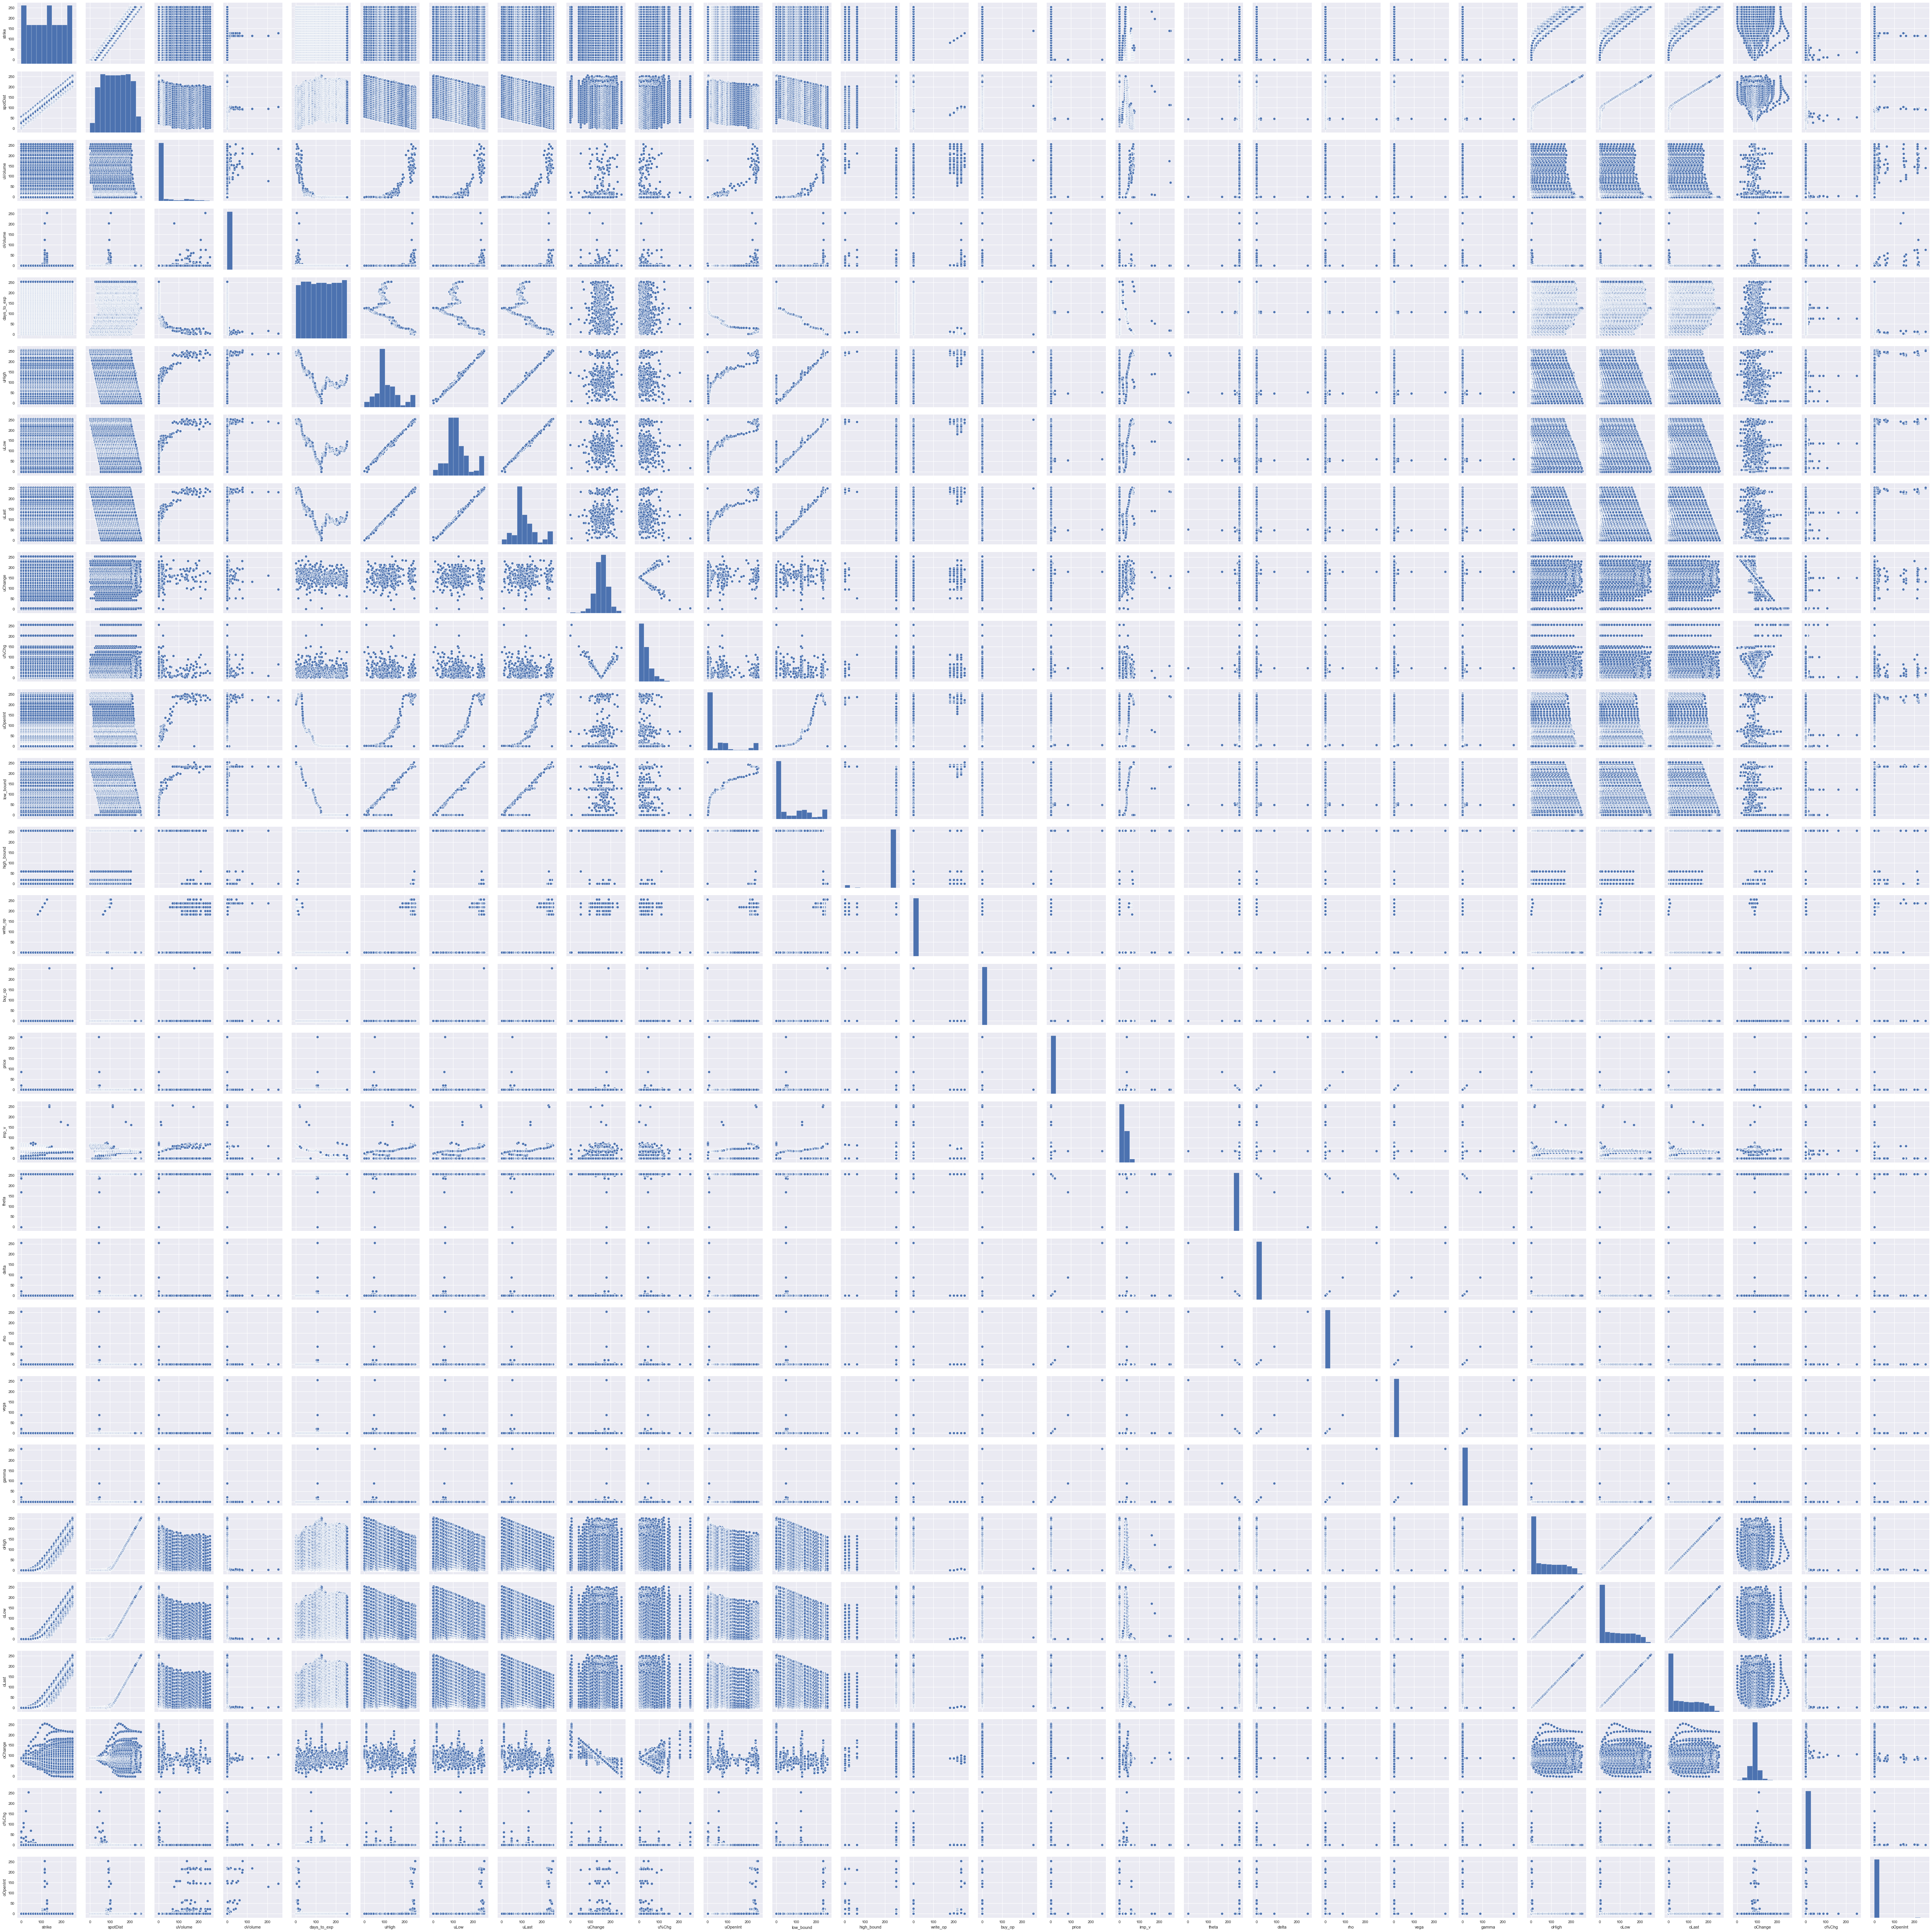

In [227]:
# visualize correlations
sns.pairplot(scaled_df.drop(columns=['target']))

In [228]:
# ordinary least squares
#lr_model = ols(formula='target~delta+spotDist+vega+oLast', data=scaled_df).fit()
#lr_model.summary()

### Correlation Matrices

In [258]:
# put correlation matrix
corr = scaled_df.corr()
corr

strike  spotDist       uVolume   oVolume   days_to_exp  \
strike       1.000000e+00  0.979758  2.725511e-17 -0.004513  1.861760e-18   
spotDist     9.797577e-01  1.000000 -1.629805e-01 -0.023963  1.208951e-01   
uVolume      2.725511e-17 -0.162981  1.000000e+00  0.120369 -6.325759e-01   
oVolume     -4.512735e-03 -0.023963  1.203693e-01  1.000000 -6.912658e-02   
days_to_exp  1.861760e-18  0.120895 -6.325759e-01 -0.069127  1.000000e+00   
uHigh        8.866015e-18 -0.199761  8.210864e-01  0.099084 -6.253642e-01   
uLow         8.046751e-17 -0.199676  8.039406e-01  0.097254 -5.747490e-01   
uLast       -2.240153e-16 -0.200100  8.140822e-01  0.097076 -6.046631e-01   
uChange     -3.637981e-20 -0.023377  6.817417e-02 -0.014725 -1.089284e-01   
u%Chg       -7.448492e-19  0.017520  3.304282e-02  0.008616 -1.193249e-01   
uOpenInt     2.409735e-16 -0.177406  9.029181e-01  0.105491 -7.735607e-01   
low_bound    2.153394e-17 -0.165277  7.914828e-01  0.088348 -9.038500e-01   
high_bound   8.653594e-17  0.098230 -6.331055e-01 -0.106871  3.581398e-01   
write_op    -3.413798e-02 -0.084920  3.141564e-01  0.256535 -1.864449e-01   
buy_op       1.468509e-03 -0.003432  2.930810e-02  0.001970 -1.708770e-02   
price       -2.611231e-02 -0.021909 -6.582422e-03 -0.000682 -4.314564e-03   
imp_v       -3.206063e-01 -0.344301  1.542998e-01 -0.001377 -5.428108e-01   
theta        2.622305e-02  0.022002  6.609962e-03  0.000685  4.334757e-03   
delta       -2.625272e-02 -0.022024 -6.616904e-03 -0.000686 -4.336185e-03   
rho         -2.606011e-02 -0.021862 -6.568398e-03 -0.000681 -4.301054e-03   
vega        -2.622340e-02 -0.022000 -6.610051e-03 -0.000685 -4.331866e-03   
gamma       -2.622890e-02 -0.022002 -6.610201e-03 -0.000685 -4.329307e-03   
oHigh        9.334162e-01  0.950047 -1.395420e-01 -0.040043  1.058677e-01   
oLow         9.332975e-01  0.949967 -1.399269e-01 -0.040524  1.061041e-01   
oLast        9.333620e-01  0.950013 -1.397159e-01 -0.040337  1.059800e-01   
oChange     -3.120671e-02 -0.013114 -4.696338e-02  0.006721  8.382136e-02   
o%Chg       -7.342748e-02 -0.072260  8.898431e-03  0.011598 -3.317172e-02   
oOpenInt    -8.941532e-03 -0.039650  1.918959e-01  0.514506 -1.104472e-01   

                    uHigh          uLow         uLast       uChange  \
strike       8.866015e-18  8.046751e-17 -2.240153e-16 -3.637981e-20   
spotDist    -1.997608e-01 -1.996761e-01 -2.000996e-01 -2.337698e-02   
uVolume      8.210864e-01  8.039406e-01  8.140822e-01  6.817417e-02   
oVolume      9.908417e-02  9.725409e-02  9.707628e-02 -1.472549e-02   
days_to_exp -6.253642e-01 -5.747490e-01 -6.046631e-01 -1.089284e-01   
uHigh        1.000000e+00  9.959241e-01  9.983274e-01  9.049067e-02   
uLow         9.959241e-01  1.000000e+00  9.977841e-01  9.042070e-02   
uLast        9.983274e-01  9.977841e-01  1.000000e+00  1.164324e-01   
uChange      9.049067e-02  9.042070e-02  1.164324e-01  1.000000e+00   
u%Chg       -6.499095e-02 -1.090810e-01 -8.602526e-02 -1.021916e-01   
uOpenInt     8.950705e-01  8.736649e-01  8.865139e-01  8.858497e-02   
low_bound    8.398262e-01  8.042123e-01  8.261046e-01  1.231294e-01   
high_bound  -4.919140e-01 -4.886115e-01 -4.908738e-01  5.325248e-03   
write_op     2.585141e-01  2.566068e-01  2.573491e-01  6.787377e-03   
buy_op       2.365110e-02  2.414255e-02  2.425911e-02  1.120024e-02   
price       -1.811324e-02 -1.862890e-02 -1.832810e-02  1.162672e-02   
imp_v        1.665676e-01  1.269843e-01  1.505920e-01  1.019374e-01   
theta        1.819240e-02  1.871450e-02  1.840677e-02 -1.168430e-02   
delta       -1.822633e-02 -1.874439e-02 -1.844162e-02  1.167860e-02   
rho         -1.809265e-02 -1.860399e-02 -1.830788e-02  1.159473e-02   
vega        -1.820385e-02 -1.872155e-02 -1.841894e-02  1.166256e-02   
gamma       -1.821768e-02 -1.873145e-02 -1.843348e-02  1.165766e-02   
oHigh       -1.767646e-01 -1.768145e-01 -1.770882e-01 -2.075397e-02   
oLow        -1.769580e-01 -1.769811e-01 -1.772681e-01 -2.065977e-02   
oLast     

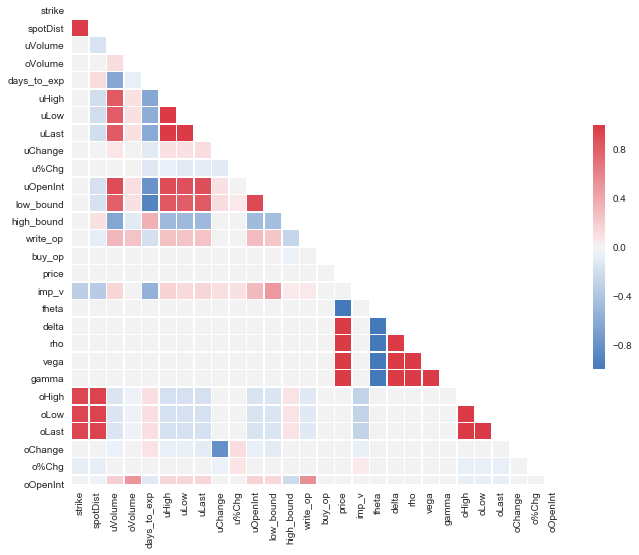

In [263]:
# visualization of call correlation matrix
CorrMtx(corr, dropDuplicates = True)

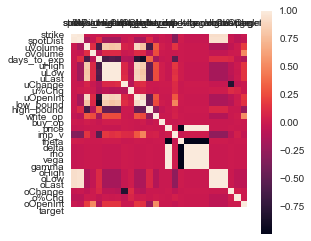

In [264]:
# visualization of call correlation matrix
plt.matshow(corr)
plt.xticks(range(len(scaled_df.columns)), scaled_df.columns)
plt.yticks(range(len(scaled_df.columns)), scaled_df.columns)
plt.colorbar()
plt.show()

In [259]:
# call map functions based on "Change" up/same/down
mapped_df = pd.concat([scaled_df['imp_v'], scaled_df['spotDist'], scaled_df['u%Chg'], scaled_df['oLast'], scaled_df['target']], axis=1)
mapped_df.head()

imp_v  spotDist  u%Chg  oLast target
0     71         1     41      0   HOLD
1     71         3     77      0   HOLD
2     70         5     13      0   HOLD
3     70         5     43      0   HOLD
4     70         6     23      0   HOLD

In [260]:
mapped_df.target.value_counts()

HOLD     10201
WRITE      148
BUY          1
Name: target, dtype: int64

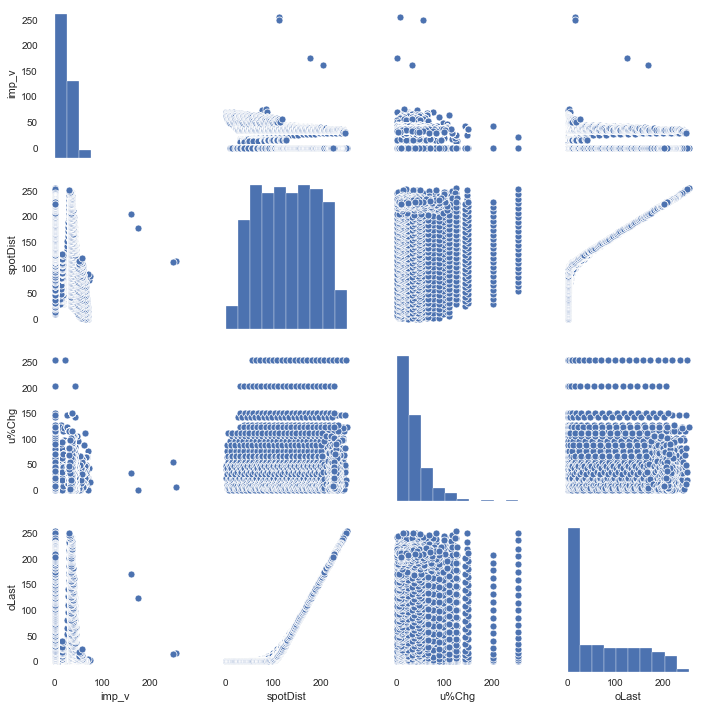

In [265]:
# visualize correlations
sns.pairplot(mapped_df)

### Resample

In [266]:
# resample
buy_df = mapped_df.loc[mapped_df['target']=='BUY']
hold_df = mapped_df.loc[mapped_df['target']=='HOLD'].sample(n=148, replace=True)
write_df = mapped_df.loc[mapped_df['target']=='WRITE']
resampled_df = pd.concat([buy_df,hold_df,write_df], axis=0)
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)
print('--before resample--')
print('mapped_df.shape:', mapped_df.shape)
print(mapped_df['target'].value_counts())
print('--after resample--')
print('resampled_df.shape:', resampled_df.shape)
print(resampled_df['target'].value_counts())
print()
print('resampled dataframe (to be exported)'.upper())
resampled_df

--before resample--
mapped_df.shape: (10350, 5)
HOLD     10201
WRITE      148
BUY          1
Name: target, dtype: int64
--after resample--
resampled_df.shape: (297, 5)
WRITE    148
HOLD     148
BUY        1
Name: target, dtype: int64

RESAMPLED DATAFRAME (TO BE EXPORTED)


imp_v  spotDist  u%Chg  oLast target
0        0       184     43    133   HOLD
1       60        86      7      1  WRITE
2       37       164     51    100   HOLD
3        0       147      8     71   HOLD
4       59        86      9      1  WRITE
5        0        85     22      0  WRITE
6       16        34      1      0   HOLD
7       16        43     43      0   HOLD
8        0       153     10     81   HOLD
9        0       154      8     83   HOLD
10       0        93     64      1  WRITE
11      59        86      7      1  WRITE
12       0       100     41      1  WRITE
13      53        97     15      3  WRITE
14      62        65     11      0  WRITE
15       0        93     43      1  WRITE
16       0        86     10      0  WRITE
17       0        93     47      4   HOLD
18      57        83     32      1  WRITE
19       0       180      3    127   HOLD
20       0        84     22      0  WRITE
21       0        75     43      0  WRITE
22       0       105     10      4  WRITE
23       0       221     11    197   HOLD
24       0        84     64      0  WRITE
25      48        23     48      0   HOLD
26      40       193     35    149   HOLD
27      43        54     57      0   HOLD
28      52        88      9      1  WRITE
29       0        77     10      0  WRITE
30       0       104     23      4  WRITE
31      48        94     12      2  WRITE
32       0       105     23      4  WRITE
33      60        95     16      2  WRITE
34      58        96     60      3  WRITE
35       0       219    124    193   HOLD
36       0        92      4      0  WRITE
37       0       192     47    146   HOLD
38      40       184      6    134   HOLD
39       0        83      8      0  WRITE
40      36       222      5    199   HOLD
41      58        86     38      1  WRITE
42      47        99      3      3  WRITE
43       0       174     12    117   HOLD
44       0       117     13     26   HOLD
45      42       123      6     31   HOLD
46       0        89     10      4   HOLD
47       0       128     53     41   HOLD
48       0        68     13      0  WRITE
49      13        57     37      0   HOLD
50       0        95     38      2  WRITE
51      42       142      0     62   HOLD
52      64        66     43      0  WRITE
53       0       121     30     32   HOLD
54      51        97      1      4  WRITE
55       0        96     23      1  WRITE
56      52        97     19      3  WRITE
57      36       218     30    192   HOLD
58       0       230     24    212   HOLD
59      57        92     32      2  WRITE
60       0       147     18     71   HOLD
61       0        67     22      0  WRITE
62       0       101     19     10   HOLD
63       0        80      9      2   HOLD
64      52       106      9      9   HOLD
65      35       117     12     26   HOLD
66       0        68     10      0  WRITE
67       0        66     64      0  WRITE
68       0       172     35    113   HOLD
69      13        51     31      0   HOLD
70      56        93     44      2  WRITE
71       0        86     64      0  WRITE
72       0        86     43      0  WRITE
73       0       180     35    127   HOLD
74      60        96     32      2  WRITE
75      60        69     32      0   HOLD
76       0        77     23      0  WRITE
77      52        97      9      3  WRITE
78      47        95    105      2  WRITE
79      35        45     46      0   HOLD
80       0        86     23      0  WRITE
81       0       153     46     80   HOLD
82      63        64     23      0  WRITE
83      43        77      9      0   HOLD
84      37        27     29      0   HOLD
85      53        85     66      1  WRITE
86      49        99     22      4  WRITE
87      37       108      4     13   HOLD
88      16        55     24      0   HOLD
89       0        68     43      0  WRITE
90       0        66     22      0  WRITE
91      64        66     12      0  WRITE
92       0       156      5     86   HOLD
93       0       230     37    212   HOLD
94       0     

# Export

In [262]:
# export the call and put dfs
mapped_df.to_csv('/Users/lucas/Desktop/futures_options/mapped.csv', index=False)
resampled_df.to_csv('/Users/lucas/Desktop/futures_options/resampled.csv', index=False)